<a href="https://colab.research.google.com/github/joaomontanha98/Google-Colab-Experiments/blob/main/Stock_Data_Web_Scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I'm building this project out of both a need for data to use for a Dashboard project and also to link the interest i have with investing and data processing

---
The main goal to start is to be able to obtain historical stock price data by a given reference input and clean it and to add a few computed indexes to the final data set


In [33]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

/tmp/ipython-input-2400623100.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers,period = '3y',interval = '1mo')
[*********************100%***********************]  4 of 4 completed


<Figure size 1000x600 with 0 Axes>

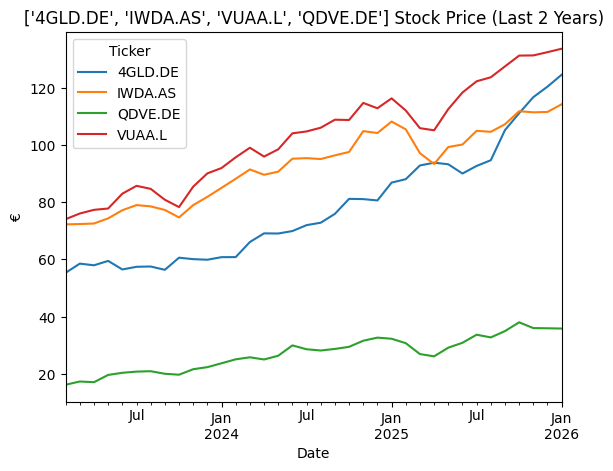

In [28]:
tickers = ['4GLD.DE','IWDA.AS','VUAA.L','QDVE.DE']

data = yf.download(tickers,period = '3y',interval = '1mo')

data.head(5)

plt.figure(figsize=(10, 6))
data['Close'].plot(title=f"{tickers} Stock Price (Last 2 Years)")

plt.ylabel('€')
plt.xlabel('Date')
plt.show()


Since i began my investment journey in 2023 i would like to check what would have been my current profit if i had started investing into the same ETF's that i stabilized currently. Assuming i maintained a fixed monthly value

<Axes: title={'center': "['4GLD.DE', 'IWDA.AS', 'VUAA.L', 'QDVE.DE'] Bought Stock Per Month (Last 3 Years)"}, xlabel='Date'>

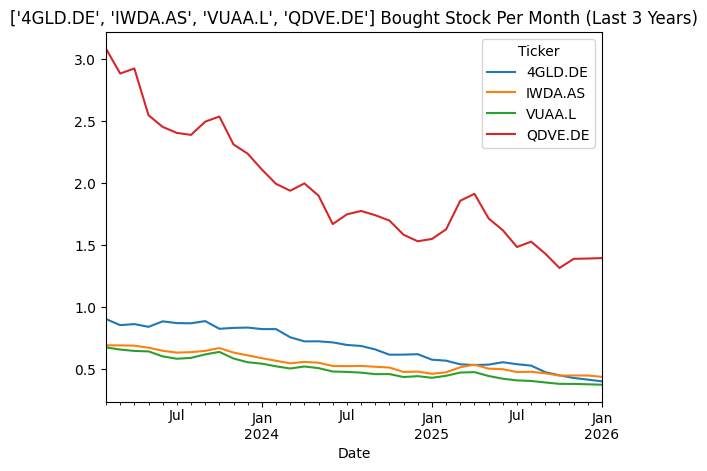

In [31]:
monthly_investment = 200
monthly_contribution = monthly_investment / len(tickers)


data['Close'][tickers].head(5)


stock_amount = monthly_contribution / data['Close'][tickers]
stock_amount.head(5)


stock_amount.plot(title=f"{tickers} Bought Stock Per Month (Last 3 Years)")


Now to compare the 2 graphs

In [35]:
df_prices =  data['Close'][tickers]
df_amounts = stock_amount

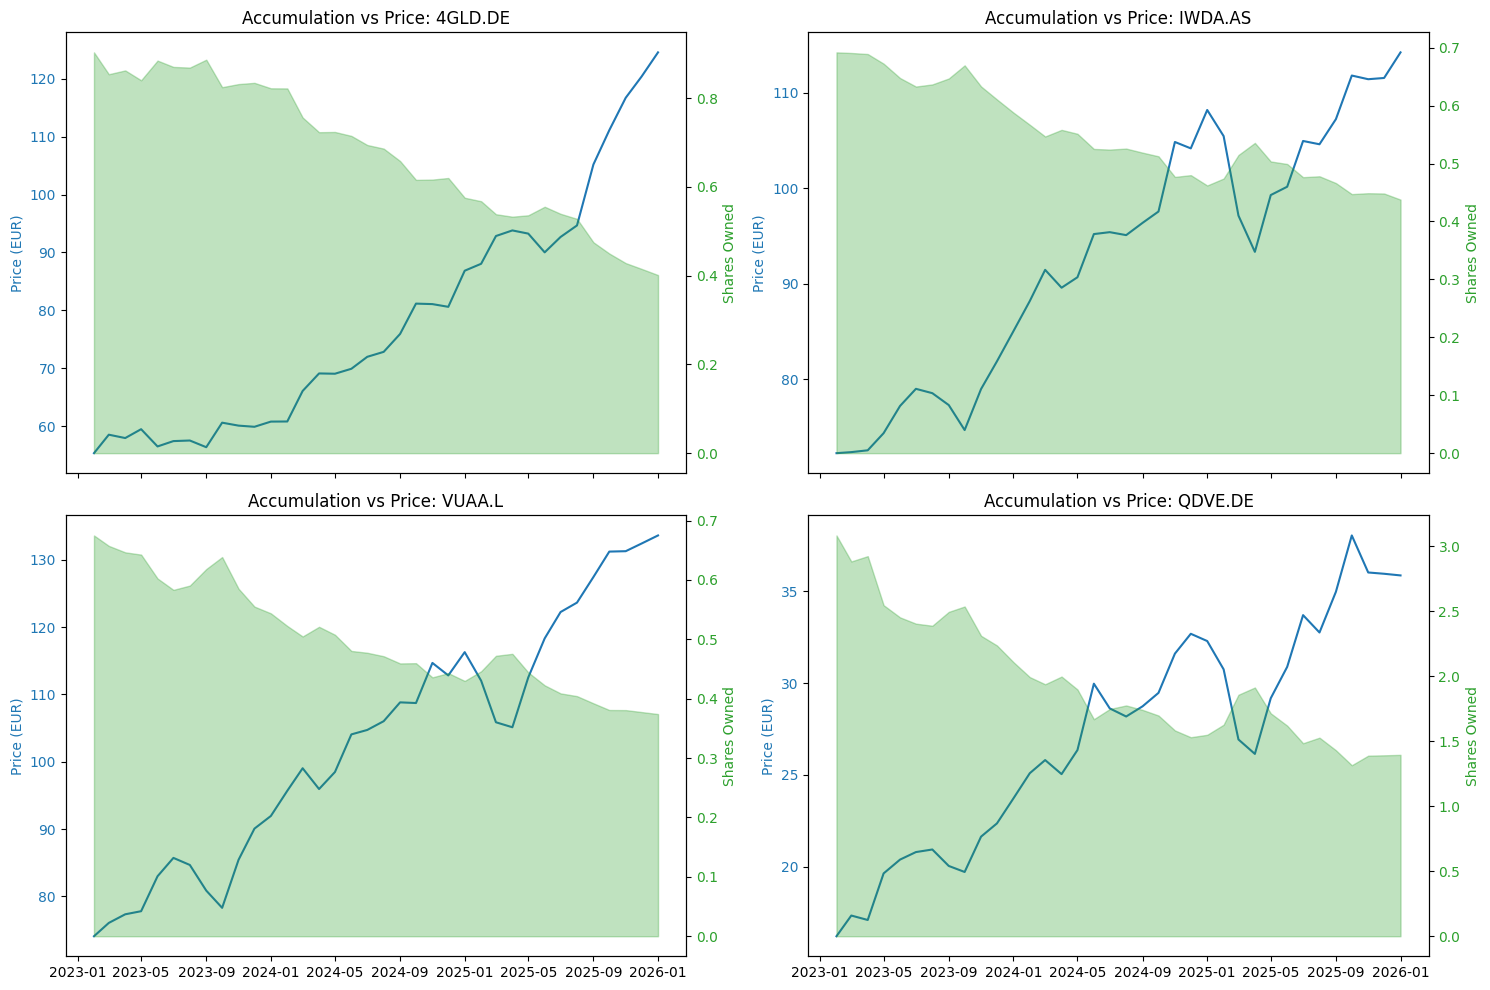

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharex=True)
axes = axes.flatten()

for i, ticker in enumerate(tickers):
    ax1 = axes[i]


    color_price = 'tab:blue'
    ax1.plot(df_prices.index, df_prices[ticker], color=color_price, label='Price')
    ax1.set_ylabel(f'Price (EUR)', color=color_price)
    ax1.tick_params(axis='y', labelcolor=color_price)
    ax1.set_title(f'Accumulation vs Price: {ticker}')

    ax2 = ax1.twinx()
    color_amount = 'tab:green'
    # 'step' or 'fill_between' is often better for "Amount Owned" to show holdings
    ax2.fill_between(df_amounts.index, df_amounts[ticker], color=color_amount, alpha=0.3, label='Quantity')
    ax2.set_ylabel('Shares Owned', color=color_amount)
    ax2.tick_params(axis='y', labelcolor=color_amount)

plt.tight_layout()
plt.show()
